In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
actors_tmdb = pd.read_csv('Data/preprocessed_data/embedding_db.csv')
actors_db_popularity = pd.read_csv('Data/preprocessed_data/actors_db.csv')[['name','popularity']]

# Merge actors_db_popularity with actors_tmdb by keeping only popularity from actors_db_popularity
actors_tmdb = pd.merge(actors_db_popularity, actors_tmdb, on='name', how='inner')

# Load actors with movies avg based on career

columns = [
    'name',
    'genre_mean_weighted',
    'number_of_movies',
    'popularity_beginning',
    'vote_average_beginning',
    'budget_beginning',
    'revenue_beginning',
    'popularity_middle',
    'vote_average_middle',
    'budget_middle',
    'revenue_middle',
    'popularity_end',
    'vote_average_end',
    'budget_end',
    'revenue_end'
]
actors_career_avg = pd.read_csv('Data/preprocessed_data/embedding_db_v2.csv')
actors_career_avg.columns = columns

actors_career_avg.drop(['genre_mean_weighted'], axis=1, inplace=True)
actors_tmdb = pd.merge(actors_tmdb, actors_career_avg, on='name', how='inner')



# Merge actors_career_avg with actors_tmdb
# One hot encode the gender data
# Add one 'Female' column with 1 if gender = 1
actors_tmdb['Female'] = actors_tmdb['gender'].apply(lambda x: 1 if x == 1 else 0)
actors_tmdb['Male'] = actors_tmdb['gender'].apply(lambda x: 1 if x == 2 else 0)
actors_tmdb.drop(['gender'],axis=1,inplace=True)


famous_actors = pd.read_csv('Data/preprocessed_data/famous_actors_db.csv')[['Actor Name','Popularity (%)']]


# Merge data
data_famous = pd.merge(actors_tmdb, famous_actors, left_on='name', right_on='Actor Name', how='inner')
data = data_famous.drop(['Actor Name','name'], axis=1)
data

,popularity,popularity_0,vote_avg_0,year_of_release_0,budget_0,revenue_0,popularity_1,vote_avg_1,year_of_release_1,budget_1,...,vote_average_middle,budget_middle,revenue_middle,popularity_end,vote_average_end,budget_end,revenue_end,Female,Male,Popularity (%)
0,220.449,127.121,8.513,2008.0,185000000.0,1.004558e+09,78.615,7.777,2012.0,250000000.0,...,6.988900,8.020000e+07,2.846164e+08,51.813833,6.760333,9.841667e+07,4.377206e+08,0,1,68
1,162.466,36.288,7.804,2000.0,10000000.0,8.355787e+07,34.472,6.698,2002.0,21000000.0,...,6.305167,3.183333e+07,6.045145e+07,41.027875,6.250000,4.712500e+07,1.357196e+08,0,1,78
2,156.714,57.090,7.019,1998.0,33000000.0,2.447211e+08,50.150,6.717,2001.0,90000000.0,...,6.389833,2.949286e+07,8.079403e+07,26.463083,6.341000,3.908333e+07,7.577516e+07,0,1,97
3,156.460,41.798,7.669,2014.0,170000000.0,7.147666e+08,52.474,6.440,2014.0,40000000.0,...,6.814286,3.000000e+07,7.171574e+07,25.635444,6.471000,3.488889e+07,8.342756e+07,1,0,92
4,146.066,28.157,6.878,2012.0,42000000.0,2.015853e+08,23.836,8.030,2015.0,13000000.0,...,5.999000,1.000000e+07,1.014302e+07,18.640000,6.079000,1.800000e+07,6.963398e+07,1,0,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,14.442,12.240,5.944,1999.0,80000000.0,0.000000e+00,48.025,6.709,2003.0,80000000.0,...,6.113000,8.750000e+06,3.787500e+07,26.717167,6.749000,3.591667e+07,1.226821e+08,1,0,53
1072,14.417,30.607,8.000,1939.0,4000000.0,4.023526e+08,8.107,5.309,1951.0,275000.0,...,5.900000,1.179000e+06,2.372567e+06,17.567333,6.402000,1.641667e+06,1.400000e+07,0,1,77
1073,14.390,30.789,8.087,2007.0,25000000.0,7.720871e+07,17.255,6.865,2012.0,65000000.0,...,6.988333,3.300000e+07,3.836814e+07,19.374200,6.743200,4.130000e+07,6.841072e+07,0,1,79
1074,14.221,23.713,6.997,1978.0,2700000.0,1.410000e+08,15.380,5.900,1979.0,35000000.0,...,5.900000,3.500000e+07,9.490000e+07,15.715667,6.480000,1.183333e+07,5.357478e+07,0,1,85


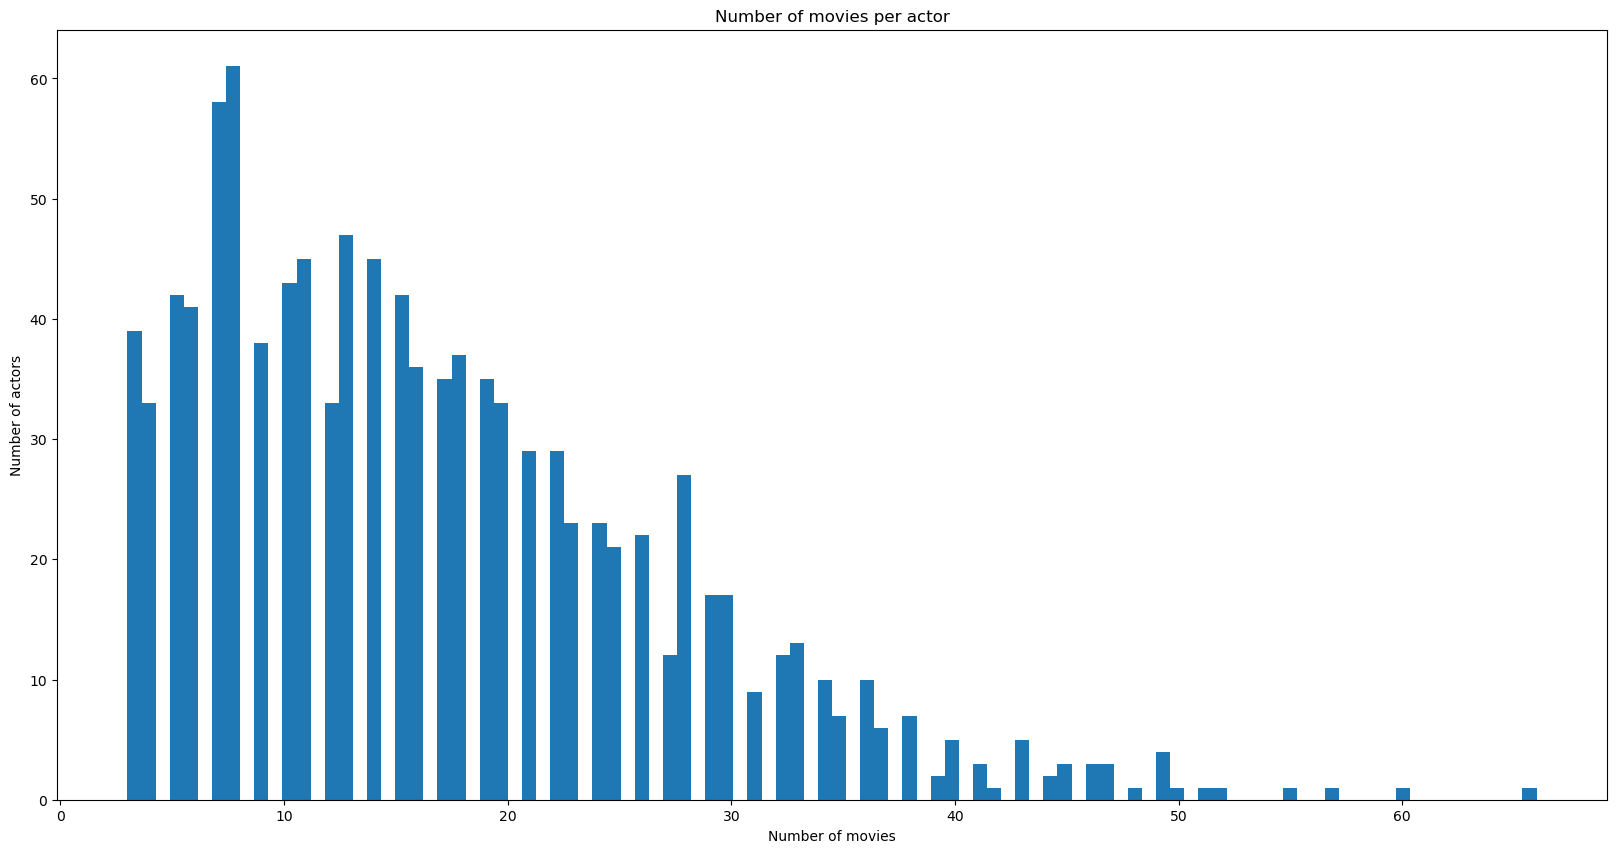

In [8]:
# Plot the number of movies per actor
plt.figure(figsize=(20,10))
plt.hist(data['number_of_movies'], bins=100)
# plt.xscale('log')
plt.xlabel('Number of movies')
plt.ylabel('Number of actors')
plt.title('Number of movies per actor')
plt.show()

In [9]:
data.columns

Index(['popularity', 'popularity_0', 'vote_avg_0', 'year_of_release_0',
       'budget_0', 'revenue_0', 'popularity_1', 'vote_avg_1',
       'year_of_release_1', 'budget_1', 'revenue_1', 'popularity_2',
       'vote_avg_2', 'year_of_release_2', 'budget_2', 'revenue_2',
       'number_of_movies', 'popularity_beginning', 'vote_average_beginning',
       'budget_beginning', 'revenue_beginning', 'popularity_middle',
       'vote_average_middle', 'budget_middle', 'revenue_middle',
       'popularity_end', 'vote_average_end', 'budget_end', 'revenue_end',
       'Female', 'Male', 'Popularity (%)'],
      dtype='object')

In [10]:
# Split data into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Split data into X and y
X_train = train.drop(['Popularity (%)'], axis=1)
y_train = train['Popularity (%)']
X_test = test.drop(['Popularity (%)'], axis=1)
y_test = test['Popularity (%)']

In [11]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.031960,0.315701,0.578125,0.989120,0.455556,0.118282,0.044702,0.598857,0.994563,0.224274,...,0.177967,0.375046,0.270000,0.095538,0.113573,0.604841,0.167750,0.079886,1.0,0.0
1,0.063992,0.105629,0.624358,0.995054,0.314815,0.122576,0.043720,0.586286,0.997528,0.211082,...,0.075299,0.532202,0.027778,0.004355,0.073637,0.688367,0.081333,0.030120,1.0,0.0
2,0.065340,0.007594,0.722817,0.984174,0.066667,0.163041,0.082732,0.542400,0.984676,0.047493,...,0.328569,0.538142,0.077778,0.175425,0.092684,0.708076,0.054000,0.019686,0.0,1.0
3,0.099627,0.084496,0.734589,0.981207,0.111111,0.101305,0.020494,0.748114,0.985171,0.038522,...,0.156356,0.535848,0.251733,0.095463,0.197919,0.777575,0.134867,0.080378,0.0,1.0
4,0.070701,0.053574,0.564426,0.991592,0.407407,0.166668,0.019531,0.329600,0.991102,0.263852,...,0.149699,0.381863,0.389333,0.167664,0.120321,0.786920,0.133600,0.095473,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,0.117199,0.038133,0.787457,0.967359,0.013889,0.000000,0.019133,0.800686,0.968364,0.003166,...,0.099730,0.594361,0.026940,0.003992,0.093582,0.779017,0.017016,0.011734,0.0,1.0
856,0.090392,0.077241,0.750642,0.992087,0.555556,0.204893,0.029972,0.661943,0.994563,0.527704,...,0.203987,0.597583,0.342778,0.188320,0.192313,0.722549,0.466933,0.284216,1.0,0.0
857,0.189554,0.130176,0.683861,0.992582,0.074074,0.058423,0.012759,0.620114,0.992091,0.019789,...,0.109145,0.371659,0.036667,0.105191,0.082220,0.570017,0.105333,0.019628,0.0,1.0
858,0.007645,0.031131,0.622217,0.975767,0.000000,0.001231,0.005745,0.400686,0.978250,0.002111,...,0.080949,0.491761,0.075697,0.000000,0.073273,0.686688,0.032000,0.012558,0.0,1.0


In [13]:
# Find best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR, LinearSVR, NuSVR

# parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':np.linspace(0.1, 10, 20), 'epsilon':np.linspace(0.1, 10, 20)}
# svr = SVR()
# clf = GridSearchCV(svr, parameters)
# clf.fit(X_train, y_train)
# best = clf.best_params_
# print(best)

# best = {'C': 10, 'epsilon': 0.1, 'kernel': 'poly'}
best = {'C': 3.2263157894736847, 'epsilon': 8.957894736842105, 'kernel': 'poly'}


# Apply SVR with best parameters
svr = SVR(kernel=best['kernel'], C=best['C'], epsilon=best['epsilon'])
svr.fit(X_train, y_train)

# Predict
pred = svr.predict(X_test)

RMSE:  13.635600425763382
R2:  0.15229367903284796
Accuracy:  0.7175925925925926


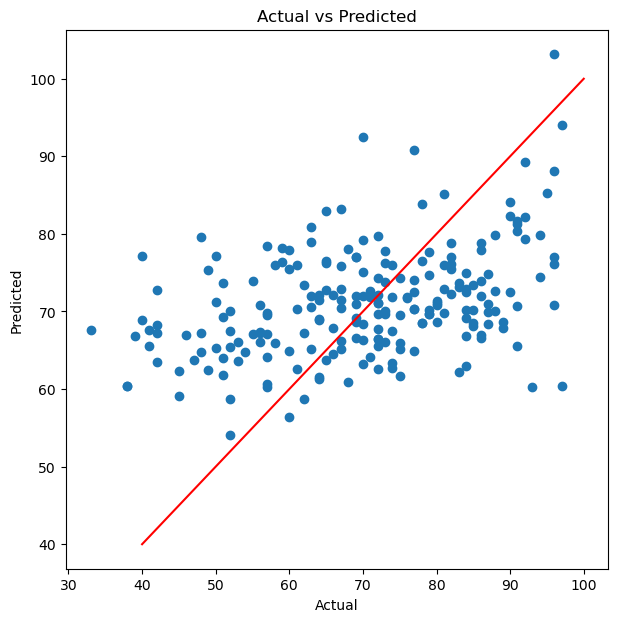

In [14]:
# Evaluate
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE: ', rmse)

# R2
def r2(y_test, pred):
    y_mean = np.mean(y_test)
    ss_tot = np.sum((y_test - y_mean)**2)
    ss_res = np.sum((y_test - pred)**2)
    return 1 - (ss_res/ss_tot)

print('R2: ', r2(y_test, pred))

# Compute the accuracy with a threshold of 15%
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df['Accuracy'] = df.apply(lambda row: 1 if abs(row['Predicted'] - row['Actual']) <= 15 else 0, axis=1)
accuracy = df['Accuracy'].sum() / len(df)
print('Accuracy: ', accuracy)


# Plot
plt.figure(figsize=(7,7))
plt.scatter(y_test, pred)
plt.plot([40,100],[40,100], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

plt.show()

In [15]:
# Display the true and predicted scores in a dataframe
display(df)

,Actual,Predicted,Accuracy
1046,66,67.831218,1
548,89,68.584346,0
731,77,72.472802,1
764,94,74.465966,0
869,45,59.083941,1
...,...,...,...
837,49,75.304827,0
910,77,70.298345,1
1074,85,68.080316,0
436,88,79.892346,1


In [16]:
# Apply SVR with best parameters on complete data
X = data.drop(['Popularity (%)'], axis=1)
y = data['Popularity (%)']

# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

# Apply SVR with best parameters
svr = SVR(kernel=best['kernel'], C=best['C'], epsilon=best['epsilon'])
svr.fit(X, y)

SVR(C=3.2263157894736847, epsilon=8.957894736842105, kernel='poly')

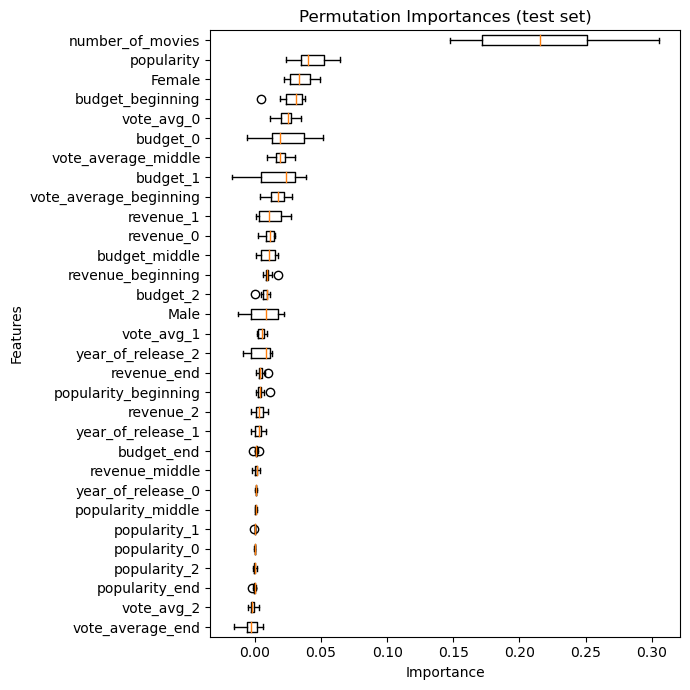

In [17]:
# Explain the model
from sklearn.inspection import permutation_importance
result = permutation_importance(svr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()


fig, ax = plt.subplots(figsize=(7,7))
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=data.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
ax.set_xlabel("Importance")
ax.set_ylabel("Features")
fig.tight_layout()

plt.show()

The number of movies played has the bigger influence on predictingg the fame, followed by the popularity and the average budget movie budget of the beginning of his career

In [18]:
# Construct df with actors from tmdb that are not in famous_actors
data_not_famous = actors_tmdb[~actors_tmdb['name'].isin(famous_actors['Actor Name'])]

# Remove all actors containing Animation in their genre
actors_genres = pd.read_csv('Data/preprocessed_data/actor_genre.csv')[['name','genre_mean_weighted','genre_mean']]
actors_genres = actors_genres[~actors_genres['genre_mean_weighted'].str.contains('Animation')]
actors_genres = actors_genres[~actors_genres['genre_mean'].str.contains('Animation')]
actors_genres = actors_genres['name']
# Merge actors_genres with data_not_famous
data_not_famous = pd.merge(actors_genres, data_not_famous, on='name', how='inner')

data_not_famous

,name,popularity,popularity_0,vote_avg_0,year_of_release_0,budget_0,revenue_0,popularity_1,vote_avg_1,year_of_release_1,...,popularity_middle,vote_average_middle,budget_middle,revenue_middle,popularity_end,vote_average_end,budget_end,revenue_end,Female,Male
0,Josh Hutcherson,148.736,68.781,7.195,2012.0,75000000.0,6.943947e+08,111.167,7.420,2013.0,...,36.286500,6.268500,3.875000e+07,8.605043e+07,34.813000,6.293400,4.026000e+07,2.225926e+08,0,1
1,Matthew Lillard,99.422,85.129,7.417,1996.0,15000000.0,1.730467e+08,61.980,6.060,2002.0,...,23.424286,5.715143,3.092857e+07,6.675419e+07,20.245875,6.035625,3.425000e+07,6.116012e+07,0,1
2,Kelly Reilly,89.152,25.301,6.805,2008.0,12850990.0,3.984669e+06,45.599,7.203,2009.0,...,36.464000,7.366500,2.050000e+07,7.267193e+07,35.421333,7.046000,7.595033e+07,2.875428e+08,1,0
3,Hayley Atwell,86.172,53.529,6.995,2011.0,140000000.0,3.705698e+08,41.798,7.669,2014.0,...,10.359000,6.400000,2.000000e+07,1.320429e+07,34.489000,6.994500,7.887988e+07,2.069380e+08,1,0
4,Zoe Saldaña,82.708,145.845,7.575,2009.0,237000000.0,2.923706e+09,43.078,7.906,2014.0,...,19.493600,6.194200,2.860500e+07,9.951703e+07,20.746333,5.900167,2.063333e+07,3.742505e+07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3875,Lyle Lovett,14.135,14.843,7.196,1992.0,8000000.0,2.170610e+07,26.421,7.221,1998.0,...,11.591000,6.267500,7.500000e+06,8.399899e+06,15.229500,6.221500,2.400000e+07,2.474227e+07,0,1
3876,Richard Derr,14.134,9.274,6.285,1951.0,936000.0,1.600000e+06,22.870,6.122,1980.0,...,7.680000,5.266000,2.000000e+06,3.000002e+06,15.064333,6.173333,8.566667e+06,4.199578e+07,0,1
3877,Michael Maloney,14.134,20.540,7.181,2006.0,25000000.0,1.353302e+08,15.815,7.109,2006.0,...,22.254000,7.180000,2.500000e+07,1.353302e+08,15.624667,6.896333,2.100000e+07,6.496717e+07,0,1
3878,Peter Cullen,14.133,87.388,7.509,1987.0,15000000.0,9.826756e+07,66.400,6.061,2017.0,...,38.546000,7.182000,4.775000e+07,6.481246e+07,16.913750,6.455750,1.477500e+08,6.831695e+08,0,1


In [19]:
data_not_famous.columns

Index(['name', 'popularity', 'popularity_0', 'vote_avg_0', 'year_of_release_0',
       'budget_0', 'revenue_0', 'popularity_1', 'vote_avg_1',
       'year_of_release_1', 'budget_1', 'revenue_1', 'popularity_2',
       'vote_avg_2', 'year_of_release_2', 'budget_2', 'revenue_2',
       'number_of_movies', 'popularity_beginning', 'vote_average_beginning',
       'budget_beginning', 'revenue_beginning', 'popularity_middle',
       'vote_average_middle', 'budget_middle', 'revenue_middle',
       'popularity_end', 'vote_average_end', 'budget_end', 'revenue_end',
       'Female', 'Male'],
      dtype='object')

In [20]:
# Now we can predict the fame of actors that are not in famous_actors
X_not_famous = data_not_famous.drop(['name'], axis=1)
X_not_famous = scaler.transform(X_not_famous)
pred_not_famous = svr.predict(X_not_famous)

# Add the predicted fame to data_not_famous
data_not_famous.loc[:,'Popularity (%)'] = pred_not_famous
data_not_famous.sort_values(by='Popularity (%)', ascending=False, inplace=True)
data_not_famous.reset_index(inplace=True,drop=True)
display(data_not_famous)

,name,popularity,popularity_0,vote_avg_0,year_of_release_0,budget_0,revenue_0,popularity_1,vote_avg_1,year_of_release_1,...,vote_average_middle,budget_middle,revenue_middle,popularity_end,vote_average_end,budget_end,revenue_end,Female,Male,Popularity (%)
0,Bess Flowers,15.064,22.100,8.168,1952.0,2540800.0,7.200000e+06,28.064,8.358,1954.0,...,7.041870,2.632991e+06,7.783130e+06,13.372320,6.913520,2.106159e+06,7.300709e+06,1,0,101.492447
1,Clint Howard,42.321,69.293,7.276,1967.0,4000000.0,2.058436e+08,24.407,7.446,1995.0,...,5.826308,3.619231e+07,1.077516e+08,16.605000,5.737800,4.920667e+07,8.260364e+07,0,1,85.473644
2,Lin Shaye,23.018,52.898,6.944,2011.0,1500000.0,9.987089e+07,43.594,6.285,2015.0,...,5.621250,2.604167e+07,8.549972e+07,17.882077,5.343538,1.240769e+07,3.407825e+07,1,0,84.510486
3,Colleen Camp,54.123,43.086,8.283,1979.0,31500000.0,1.500000e+08,54.981,7.256,1995.0,...,6.091750,3.350000e+07,7.407040e+07,14.193692,5.694154,2.567692e+07,3.396140e+07,1,0,84.163751
4,Stephen Tobolowsky,18.160,28.221,7.608,1993.0,14600000.0,7.107405e+07,38.650,8.187,2000.0,...,5.924267,2.310667e+07,2.400565e+07,29.850176,5.567706,2.522059e+07,9.925349e+07,0,1,83.459616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3875,Lee Ingleby,19.387,23.925,7.385,1998.0,26000000.0,6.570577e+07,25.987,7.134,2003.0,...,8.019000,1.300000e+08,7.898046e+08,17.393000,5.600000,6.700000e+07,2.530304e+07,0,1,41.485272
3876,Katie Lowes,15.078,79.249,7.331,2012.0,165000000.0,4.712229e+08,129.064,7.735,2014.0,...,4.685000,1.000000e+05,0.000000e+00,49.311500,7.045500,1.075000e+08,3.656594e+08,1,0,41.094055
3877,Hannah Walters,18.083,118.842,6.538,2011.0,379000000.0,1.045714e+09,81.233,6.647,2017.0,...,5.800000,3.500000e+06,3.546280e+05,104.257000,6.538000,3.790000e+08,1.045714e+09,1,0,40.589875
3878,Isabel Lucas,17.400,20.174,6.173,2009.0,200000000.0,8.363037e+08,18.474,6.274,2009.0,...,7.932000,0.000000e+00,1.162422e+06,28.209000,5.981000,7.500000e+07,2.269040e+08,1,0,38.206844


In [21]:
# Combine data_not_famous with data_famous and sort by fame
data_final = pd.concat([data_famous, data_not_famous]).drop(['Actor Name','Female','Male'], axis=1)
data_final.sort_values(by=['Popularity (%)'], ascending=False, inplace=True)
data_final.reset_index(inplace=True, drop=True)
data_final

,name,popularity,popularity_0,vote_avg_0,year_of_release_0,budget_0,revenue_0,popularity_1,vote_avg_1,year_of_release_1,...,revenue_beginning,popularity_middle,vote_average_middle,budget_middle,revenue_middle,popularity_end,vote_average_end,budget_end,revenue_end,Popularity (%)
0,Bess Flowers,15.064,22.100,8.168,1952.0,2540800.0,7.200000e+06,28.064,8.358,1954.0,...,2.300578e+06,12.571391,7.041870,2.632991e+06,7.783130e+06,13.372320,6.913520,2.106159e+06,7.300709e+06,101.492447
1,Johnny Depp,57.737,122.016,7.796,2003.0,140000000.0,6.550112e+08,112.654,7.042,2005.0,...,3.115995e+07,30.555778,6.634667,4.900778e+07,1.268698e+08,47.076182,6.486636,9.909091e+07,2.838917e+08,98.000000
2,Morgan Freeman,91.283,125.459,8.700,1994.0,25000000.0,2.834147e+07,67.642,8.370,1995.0,...,7.609974e+07,24.565733,6.383067,5.116667e+07,1.305805e+08,31.142412,6.676471,6.858824e+07,2.182714e+08,98.000000
3,Leonardo DiCaprio,67.448,139.510,7.899,1997.0,200000000.0,2.264162e+09,73.015,8.200,2010.0,...,4.216352e+07,38.644600,7.540400,7.300000e+07,2.043751e+08,30.425800,7.071400,6.900000e+07,2.100552e+08,98.000000
4,Jim Carrey,43.590,67.653,8.134,1998.0,60000000.0,2.641182e+08,48.025,6.709,2003.0,...,1.014223e+08,48.692625,6.798250,6.475000e+07,2.386452e+08,28.914900,6.602100,7.630000e+07,1.789805e+08,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,Sophie Okonedo,17.156,24.067,6.304,1995.0,30000000.0,2.123855e+08,18.113,7.718,2004.0,...,1.239231e+08,21.223000,6.174333,3.983333e+07,3.841985e+07,12.337667,6.509667,1.266667e+07,1.598212e+07,37.000000
4952,Irrfan Khan,19.418,90.379,6.694,2012.0,215000000.0,7.579307e+08,48.207,7.396,2012.0,...,1.180555e+06,13.331333,6.796000,1.466667e+07,2.122011e+07,18.775000,6.297200,2.962000e+07,2.006654e+08,36.000000
4953,Ryan Ochoa,14.577,59.431,6.860,2009.0,200000000.0,3.252866e+08,18.363,6.000,2011.0,...,3.252866e+08,14.594000,6.803000,1.250000e+07,3.878993e+06,19.067000,6.000000,1.500000e+08,3.899276e+07,35.416928
4954,Rinko Kikuchi,18.708,20.540,7.181,2006.0,25000000.0,1.353302e+08,73.085,6.881,2013.0,...,1.353302e+08,16.066000,6.606000,2.000000e+07,5.530764e+06,38.073000,6.466500,1.150000e+08,2.131529e+08,33.000000


In [22]:
data_famous.sort_values(by=['Popularity (%)'], ascending=False, inplace=True)
data_famous

,name,popularity,popularity_0,vote_avg_0,year_of_release_0,budget_0,revenue_0,popularity_1,vote_avg_1,year_of_release_1,...,budget_middle,revenue_middle,popularity_end,vote_average_end,budget_end,revenue_end,Female,Male,Actor Name,Popularity (%)
14,Morgan Freeman,91.283,125.459,8.700,1994.0,25000000.0,2.834147e+07,67.642,8.370,1995.0,...,5.116667e+07,1.305805e+08,31.142412,6.676471,6.858824e+07,2.182714e+08,0,1,Morgan Freeman,98
75,Johnny Depp,57.737,122.016,7.796,2003.0,140000000.0,6.550112e+08,112.654,7.042,2005.0,...,4.900778e+07,1.268698e+08,47.076182,6.486636,9.909091e+07,2.838917e+08,0,1,Johnny Depp,98
50,Leonardo DiCaprio,67.448,139.510,7.899,1997.0,200000000.0,2.264162e+09,73.015,8.200,2010.0,...,7.300000e+07,2.043751e+08,30.425800,7.071400,6.900000e+07,2.100552e+08,0,1,Leonardo DiCaprio,98
222,Jim Carrey,43.590,67.653,8.134,1998.0,60000000.0,2.641182e+08,48.025,6.709,2003.0,...,6.475000e+07,2.386452e+08,28.914900,6.602100,7.630000e+07,1.789805e+08,0,1,Jim Carrey,98
92,Tom Cruise,56.208,77.884,7.073,2011.0,145000000.0,6.947134e+08,35.520,6.622,2013.0,...,4.680000e+07,2.328420e+08,35.514800,6.540600,9.550000e+07,3.084758e+08,0,1,Tom Cruise,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,Samantha Morton,30.543,29.135,7.342,2002.0,102000000.0,3.583729e+08,53.703,6.303,2012.0,...,2.750000e+07,3.825758e+07,22.154750,6.781500,7.387500e+07,7.568643e+07,1,0,Samantha Morton,37
1003,Sophie Okonedo,17.156,24.067,6.304,1995.0,30000000.0,2.123855e+08,18.113,7.718,2004.0,...,3.983333e+07,3.841985e+07,12.337667,6.509667,1.266667e+07,1.598212e+07,1,0,Sophie Okonedo,37
925,Irrfan Khan,19.418,90.379,6.694,2012.0,215000000.0,7.579307e+08,48.207,7.396,2012.0,...,1.466667e+07,2.122011e+07,18.775000,6.297200,2.962000e+07,2.006654e+08,0,1,Irrfan Khan,36
953,Rinko Kikuchi,18.708,20.540,7.181,2006.0,25000000.0,1.353302e+08,73.085,6.881,2013.0,...,2.000000e+07,5.530764e+06,38.073000,6.466500,1.150000e+08,2.131529e+08,1,0,Rinko Kikuchi,33


In [23]:
data_famous[data_famous['name'] == 'Leonardo DiCaprio']

,name,popularity,popularity_0,vote_avg_0,year_of_release_0,budget_0,revenue_0,popularity_1,vote_avg_1,year_of_release_1,...,budget_middle,revenue_middle,popularity_end,vote_average_end,budget_end,revenue_end,Female,Male,Actor Name,Popularity (%)
50,Leonardo DiCaprio,67.448,139.51,7.899,1997.0,200000000.0,2.264162e+09,73.015,8.2,2010.0,...,73000000.0,204375103.8,30.4258,7.0714,69000000.0,210055193.0,0,1,Leonardo DiCaprio,98


In [24]:
data_final[data_final['name'] == 'Leonardo DiCaprio']

,name,popularity,popularity_0,vote_avg_0,year_of_release_0,budget_0,revenue_0,popularity_1,vote_avg_1,year_of_release_1,...,revenue_beginning,popularity_middle,vote_average_middle,budget_middle,revenue_middle,popularity_end,vote_average_end,budget_end,revenue_end,Popularity (%)
3,Leonardo DiCaprio,67.448,139.51,7.899,1997.0,200000000.0,2.264162e+09,73.015,8.2,2010.0,...,42163515.0,38.6446,7.5404,73000000.0,204375103.8,30.4258,7.0714,69000000.0,210055193.0,98.0


We see that the ranking of dicaprio went from 51th to 5th, so our prediction seems to successfully scale back older actors to represent a more intemporal metric